## Assignment 2

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong


**Question**

Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


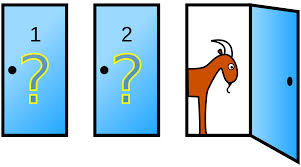

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#)

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


In [2]:
import random

def run_trial(switch_doors):
    """
    Run a single trial of the Monty Hall problem.
    "Car" is behind door 1 and "Goats" are behind 2 and 3.
    
    Args
    -------
    switch_doors : bool
        true = switch doors; false - don't switch
        
    Returns
    -------
    bool
        True if chose car (door 1). False otherwise.

    """

    # Pick a random door out of the ndoors available
    chosen_door = random.randint(1, 3)
    if switch_doors:
        # Reveal a goat (either door 2 or 3)
        if chosen_door == 2:
            revealed_door = 3  
        else:
            revealed_door = 2
        
        # Switch doors
        # Create list of doors that are neither the chosen nor revealed doors
        available_doors = [x for x in range(1,4)
                                if x not in (chosen_door, revealed_door)]
        # Choose a door randomly
        chosen_door = random.choice(available_doors)

    # if 1 was chosen, True (win)
    return chosen_door == 1

def run_trials(num_trials, switch_doors):
    """
    Run `num_trials` iterations of the Monty Hall problem.
    
    Args
    ------
    num_trials : int
        number of iterations to run the Monty Hall problem
    switch_doors : bool
        true = switch doors; false - don't switch
        
    Returns
    -------
    int
        number of trials that resulted in a win

    """

    win_count = 0
    for i in range(num_trials):
        if run_trial(switch_doors):
            win_count += 1
            
    return win_count


## Run 1000 trials without switching and 1000 trials with switching

In [5]:
num_trials = 1000

# get result without switches (False)
wins_no_switch = run_trials(num_trials, False)
# get result with switches (True)
wins_switch = run_trials(num_trials, True)

print('Proportion of wins without switching: {:.1f}%'
            .format(wins_no_switch/num_trials*100))
print('Proportion of wins with switching: {:.1f}%'
            .format(wins_switch/num_trials*100))

Proportion of wins without switching: 34.9%
Proportion of wins with switching: 67.6%


Switching is the correct strategy because in the first choice, the probability is 1 out of 3, but if you switch, it's 2/3.